In [ ]:
import numpy as np
from scipy.linalg import expm  # Schur + scaling & squaring under the hood

A = np.load(r"C:\Users\HP\bert_experiments\matrcies\Probabilities_NGSL.npy")  # (5000, 5000) float64 ndarray
#E = expm(A)  # shape (5000, 5000); ~200 MB for the result (+ temporaries)

In [ ]:
A[5][5]

In [10]:
B = A - 0.1 * np.eye(A.shape[0])

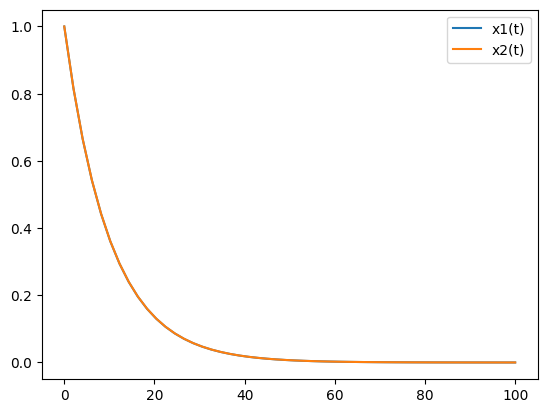

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import expm_multiply

A = B
x0 = np.zeros(4552)
x0[3159] = 1
x0[1043] = 1
x0[1674] = 1
x0[1068] = 1
x0[3401] = 1
x0[2296] = 1


times = np.linspace(0, 100, 50)
X = np.column_stack([expm_multiply(A * t, x0) for t in times])

plt.plot(times, X[3159], label='x1(t)')
plt.plot(times, X[1043], label='x2(t)')
plt.legend()
plt.show()


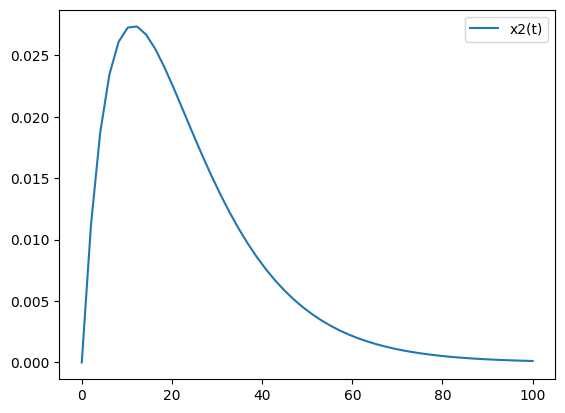

In [36]:
#plt.plot(times, X[3159], label='x1(t)')
plt.plot(times, X[1116], label='x2(t)')
plt.legend()
plt.show()

In [34]:
import pandas as pd

t1 = 16.0
idx = np.argmin(np.abs(times - t1))
x_t1 = X[:, idx]
order = np.argsort(-x_t1)

# Load names from CSV
names = pd.read_csv(r"C:\Users\HP\bert_experiments\NGSL_lists\NEWEST_NGSL.csv", usecols=[0]).iloc[:,0].tolist()

# Show top 10 dimensions with names
topk = order[:1000]
print(f"Top 10 at t={times[idx]:.3f}:")
j = 0
for i in topk:
    j+=1
    print(f"pos {j}    dim {i:4d} → {names[i - 1]}  (value={x_t1[i]:.6f})")

Top 10 at t=16.327:
pos 1    dim 3401 → the  (value=0.229741)
pos 2    dim 1068 → at  (value=0.198516)
pos 3    dim 1043 → around  (value=0.196040)
pos 4    dim 3159 → sit  (value=0.195736)
pos 5    dim 1674 → eat  (value=0.195560)
pos 6    dim 2296 → leg  (value=0.195456)
pos 7    dim 1116 → be  (value=0.025503)
pos 8    dim 3436 → to  (value=0.018341)
pos 9    dim 2556 → of  (value=0.017784)
pos 10    dim 2148 → in  (value=0.015836)
pos 11    dim  887 → a  (value=0.010442)
pos 12    dim  998 → and  (value=0.009851)
pos 13    dim 2114 → I  (value=0.007979)
pos 14    dim 2050 → have  (value=0.006848)
pos 15    dim 3400 → that  (value=0.006387)
pos 16    dim 1912 → for  (value=0.005871)
pos 17    dim 2227 → it  (value=0.005532)
pos 18    dim 3683 → you  (value=0.005502)
pos 19    dim 2051 → he  (value=0.005138)
pos 20    dim 3411 → they  (value=0.003949)
pos 21    dim 1052 → as  (value=0.003884)
pos 22    dim 3597 → we  (value=0.003810)
pos 23    dim 3653 → with  (value=0.003622)
pos 24